In [1]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics
import pandas as pd

from sklearn import preprocessing 


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D


In [2]:
dataset = pd.read_csv('simulacion_ventas_coches.csv')
print(dataset)

     Cliente  Accord  Civic  CR-V     E  HR-V  Jazz   NSX
0       1001       1      4     5     6     3     4     5
1       1002       5      1     3     6    31     1     3
2       1003      64     35    12     2    56     3     4
3       1004      43     34    67     2     3    55     6
4       1005      23      0     5     9     2    21    12
..       ...     ...    ...   ...   ...   ...   ...   ...
191     1192   22813   8206  2967   638  1933  1521  1925
192     1193   22740   8687  2048  1058   222   232   554
193     1194   23675  11052  1603   477   332   572  3925
194     1195   19903   9289  1248  2049   321  1922  1914
195     1196   19914   8033  2968   539  1032  2821  2025

[196 rows x 8 columns]


In [3]:
 #solo se ocupa cuando es necesario o tengamos valores nulos en el csv
#ELiminar filas que tengan valor NaN.
 dataset = dataset.dropna()
 dataset = dataset.reset_index(drop=True)

In [4]:
# Eliminamar columna de clientes ya que no se usara 
id = dataset['Cliente'] # Guardamos columna
dataset = dataset.drop('Cliente', 1) # Borramos la columna 

In [5]:
#normalizar los datos con MinMax
min_max_scaler = preprocessing.MinMaxScaler() 
dataset_escalado = min_max_scaler.fit_transform(dataset)
dataset_escalado = pd.DataFrame(dataset_escalado) 
dataset_escalado = dataset_escalado.rename(columns = {0: 'Close', 1: 'Volume'})

In [6]:
dataset_escalado

,Close,Volume,2,3,4,5,6
0,0.000000,0.000111,0.000675,0.002441,0.000518,0.001024,0.001274
1,0.000060,0.000028,0.000000,0.002441,0.015018,0.000000,0.000764
2,0.000943,0.000971,0.003035,0.000488,0.027965,0.000682,0.001019
3,0.000629,0.000943,0.021585,0.000488,0.000518,0.018424,0.001529
4,0.000329,0.000000,0.000675,0.003906,0.000000,0.006824,0.003057
...,...,...,...,...,...,...,...
191,0.341502,0.227698,0.999663,0.311035,1.000000,0.518594,0.490446
192,0.340409,0.241044,0.689713,0.516113,0.113931,0.078813,0.141146
193,0.354407,0.306668,0.539629,0.232422,0.170896,0.194814,1.000000
194,0.297939,0.257749,0.419899,1.000000,0.165199,0.655408,0.487643


In [7]:
dataset_escalado.describe() #para ver los estadisticos de los valores ya normalizados

,Close,Volume,2,3,4,5,6
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,0.470932,0.535783,0.620129,0.430505,0.442364,0.529709,0.492615
std,0.207276,0.224669,0.259682,0.296753,0.363238,0.362817,0.256067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.335432,0.399754,0.417454,0.245483,0.153159,0.186882,0.386178
50%,0.458996,0.550320,0.538111,0.299561,0.168048,0.516718,0.485605
75%,0.601970,0.693173,0.689123,0.510376,0.874806,0.955732,0.515223
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Buscando de la cantidad Optima de cluster por el metodo dejambu

suma_cuadrado_wcss = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(dataset_escalado)# APlicado K-means a la base de datos
    suma_cuadrado_wcss.append(kmeans.inertia_)

<function matplotlib.pyplot.show(*args, **kw)>

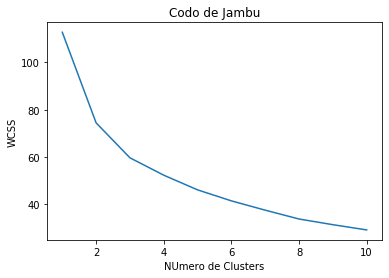

In [9]:
plt.plot(range(1, 11), suma_cuadrado_wcss)
plt.title("Codo de Jambu")
plt.xlabel("NUmero de Clusters")
plt.ylabel("WCSS")
plt.show

In [10]:
#METODO K-MEANS
clustering = KMeans(n_clusters = 2, max_iter = 300)#creacion del modelo
clustering.fit(dataset_escalado)#Aplicacion del modelo

KMeans(algorithm="auto", copy_x=True, init="k-means++", max_iter=300, 
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances="auto",
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
dataset["KMeans_Clusters"] = clustering.labels_ 
dataset

,Accord,Civic,CR-V,E,HR-V,Jazz,NSX,KMeans_Clusters
0,1,4,5,6,3,4,5,0
1,5,1,3,6,31,1,3,0
2,64,35,12,2,56,3,4,0
3,43,34,67,2,3,55,6,0
4,23,0,5,9,2,21,12,0
...,...,...,...,...,...,...,...,...
191,22813,8206,2967,638,1933,1521,1925,1
192,22740,8687,2048,1058,222,232,554,0
193,23675,11052,1603,477,332,572,3925,0
194,19903,9289,1248,2049,321,1922,1914,0


In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_dataset = pca.fit_transform(dataset_escalado)
pca_dataset_df = pd.DataFrame(data = pca_dataset, columns = ["Componente_1", "Componente_2"])
pca_nombres_coches = pd.concat([pca_dataset_df, dataset[["KMeans_Clusters"]]], axis=1)

pca_nombres_coches

,Componente_1,Componente_2,KMeans_Clusters
0,1.106903,-0.714751,0
1,1.098530,-0.719460,0
2,1.089040,-0.723126,0
3,1.090897,-0.713059,0
4,1.102925,-0.714563,0
...,...,...,...
191,-0.335538,-0.296445,1
192,0.611632,0.011895,0
193,0.414483,0.054140,0
194,0.135400,0.148418,0


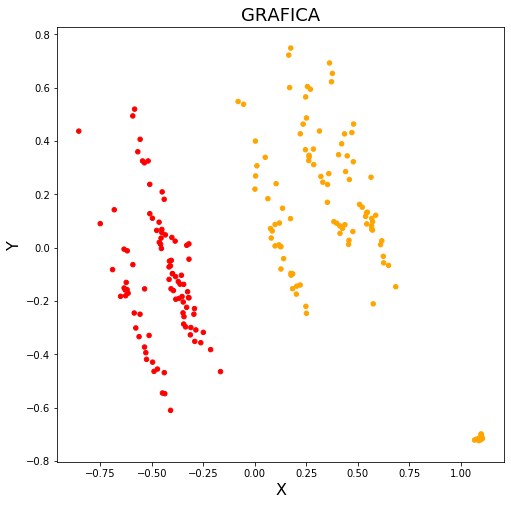

In [14]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("X", fontsize = 16)
ax.set_ylabel("Y", fontsize = 16)
ax.set_title("GRAFICA", fontsize = 18)

color_theme = np.array(("orange", "red"))
ax.scatter(x = pca_nombres_coches.Componente_1, y = pca_nombres_coches.Componente_2,
           c=color_theme[pca_nombres_coches.KMeans_Clusters], s = 20)
plt.show()

In [15]:
#Grabamos los clusters en nuestra carpeta
dataset.to_csv("Simulacion ventas coches con K-Means.csv")